The data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics (b) its assigned insurance risk rating (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

In [2]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading the dataset
data=pd.read_csv('Automobile_data.csv')

In [5]:
print(data)

     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [6]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
data.shape

(205, 26)

In [9]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [10]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


From the above snapshot of the data, we can see that some columns have missing values '?'

# Missing Value Detection and Treatment

In [11]:
#Let's start by checking the count of records in each column of the data set.
#If the count of records is lesser than the total number of records i.e. 768, we can conclude that there are blank records.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
#Since some of the predictor columns are continuous in nature, there might be a chance that 0's in these columns indicate
#missing data.

#Let's check the above claim.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


None of the continuous columns seem to have missing values represented by 0's. We can also see that there are a total of 11 continuous variables, but the describe table has only 10 continuous variables. This is because column "normalized losses" has missing values. 

In [14]:
#Treating missing values in the "normalized losses" column
from numpy import nan
data['normalized-losses']=data['normalized-losses'].replace('?', np.nan)

In [15]:
#Let's check if the '?' have been replaced with nan
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [16]:
print(data.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


Normalized-losses has 41 missing data points. We will replace these missing values with the median of 'Normalized-Losses' because median is least affected by outliers.

In [17]:
#Imputing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

In [18]:
data.median()

symboling               1.0
normalized-losses     115.0
wheel-base             97.0
length                173.2
width                  65.5
height                 54.1
curb-weight          2414.0
engine-size           120.0
compression-ratio       9.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

In [19]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [20]:
print(data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Also, notice that the data type of Normalized Losses is object, we have to change it's data type to numeric (float)

In [27]:
data['normalized-losses']=pd.to_numeric(data['normalized-losses'], downcast="float")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [26]:
#data['normalized-losses']=data['normalized-losses'].astype('float64')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Outlier Detection and Treatment

Outlier Detection

Boxplots are a great way of detecting outliers. Once the outliers have been detected they can be imputed with the 5th and 95th percentiles.

In [30]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

<AxesSubplot:xlabel='compression-ratio'>

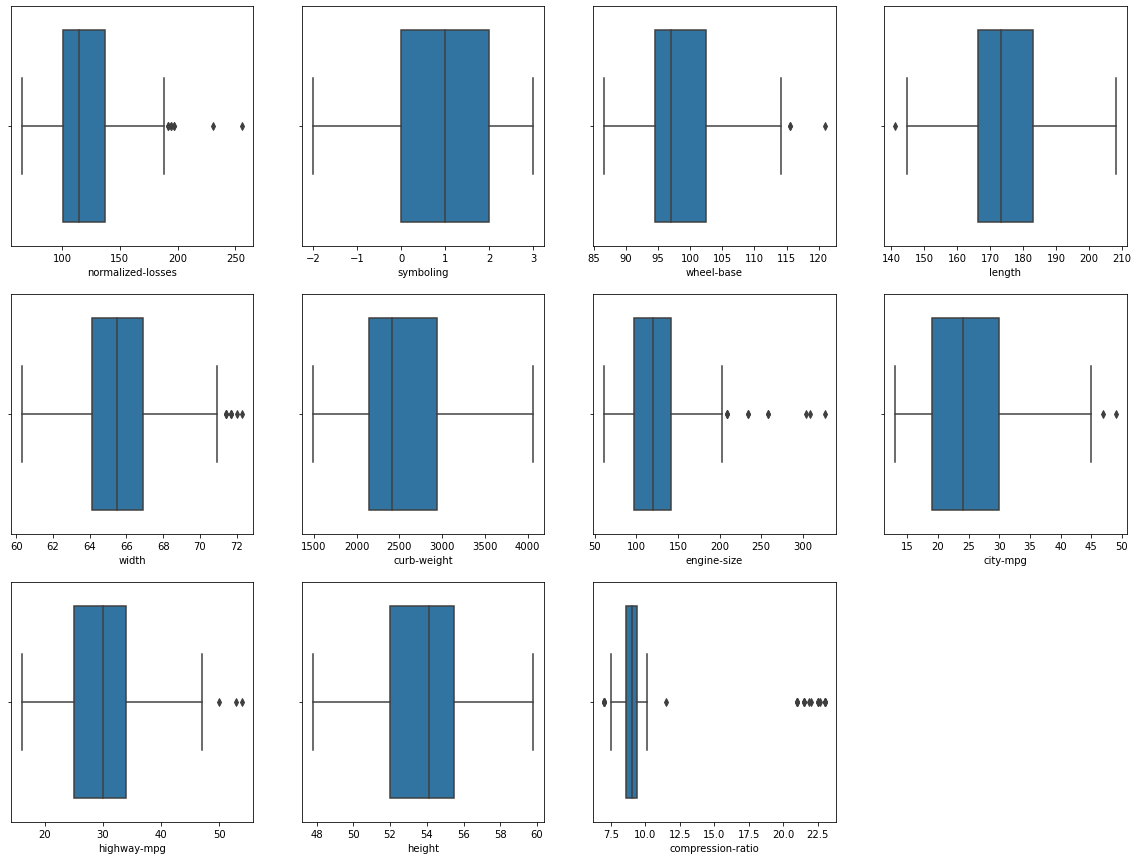

In [33]:
#Outlier detection using boxplots
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])

From the above boxplots we can infer that out 11 continuous variables 8 of them have outliers.These outliers will be imputed with the 5th and 95th percentiles.

In [34]:
data['normalized-losses']=data['normalized-losses'].clip(lower=data['normalized-losses'].quantile(0.05), upper=data['normalized-losses'].quantile(0.95))

In [35]:
data['wheel-base']=data['wheel-base'].clip(lower=data['wheel-base'].quantile(0.05), upper=data['wheel-base'].quantile(0.95))
data['length']=data['length'].clip(lower=data['length'].quantile(0.05), upper=data['length'].quantile(0.95))
data['width']=data['width'].clip(lower=data['width'].quantile(0.05), upper=data['width'].quantile(0.95))
data['engine-size']=data['engine-size'].clip(lower=data['engine-size'].quantile(0.05), upper=data['engine-size'].quantile(0.95))
data['city-mpg']=data['city-mpg'].clip(lower=data['city-mpg'].quantile(0.05), upper=data['city-mpg'].quantile(0.95))
data['highway-mpg']=data['highway-mpg'].clip(lower=data['highway-mpg'].quantile(0.05), upper=data['highway-mpg'].quantile(0.95))
data['compression-ratio']=data['compression-ratio'].clip(lower=data['compression-ratio'].quantile(0.05), upper=data['compression-ratio'].quantile(0.89))

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

<AxesSubplot:xlabel='compression-ratio'>

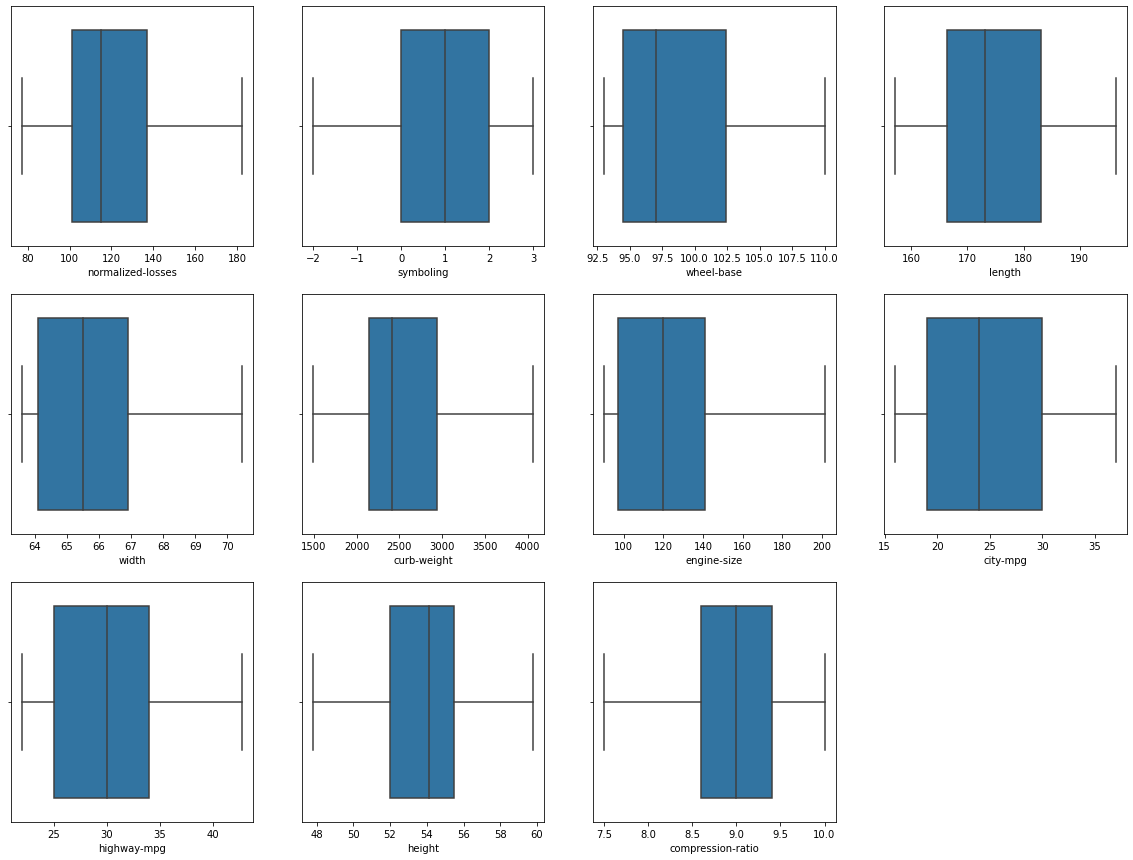

In [36]:
plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])



# Data Visualization

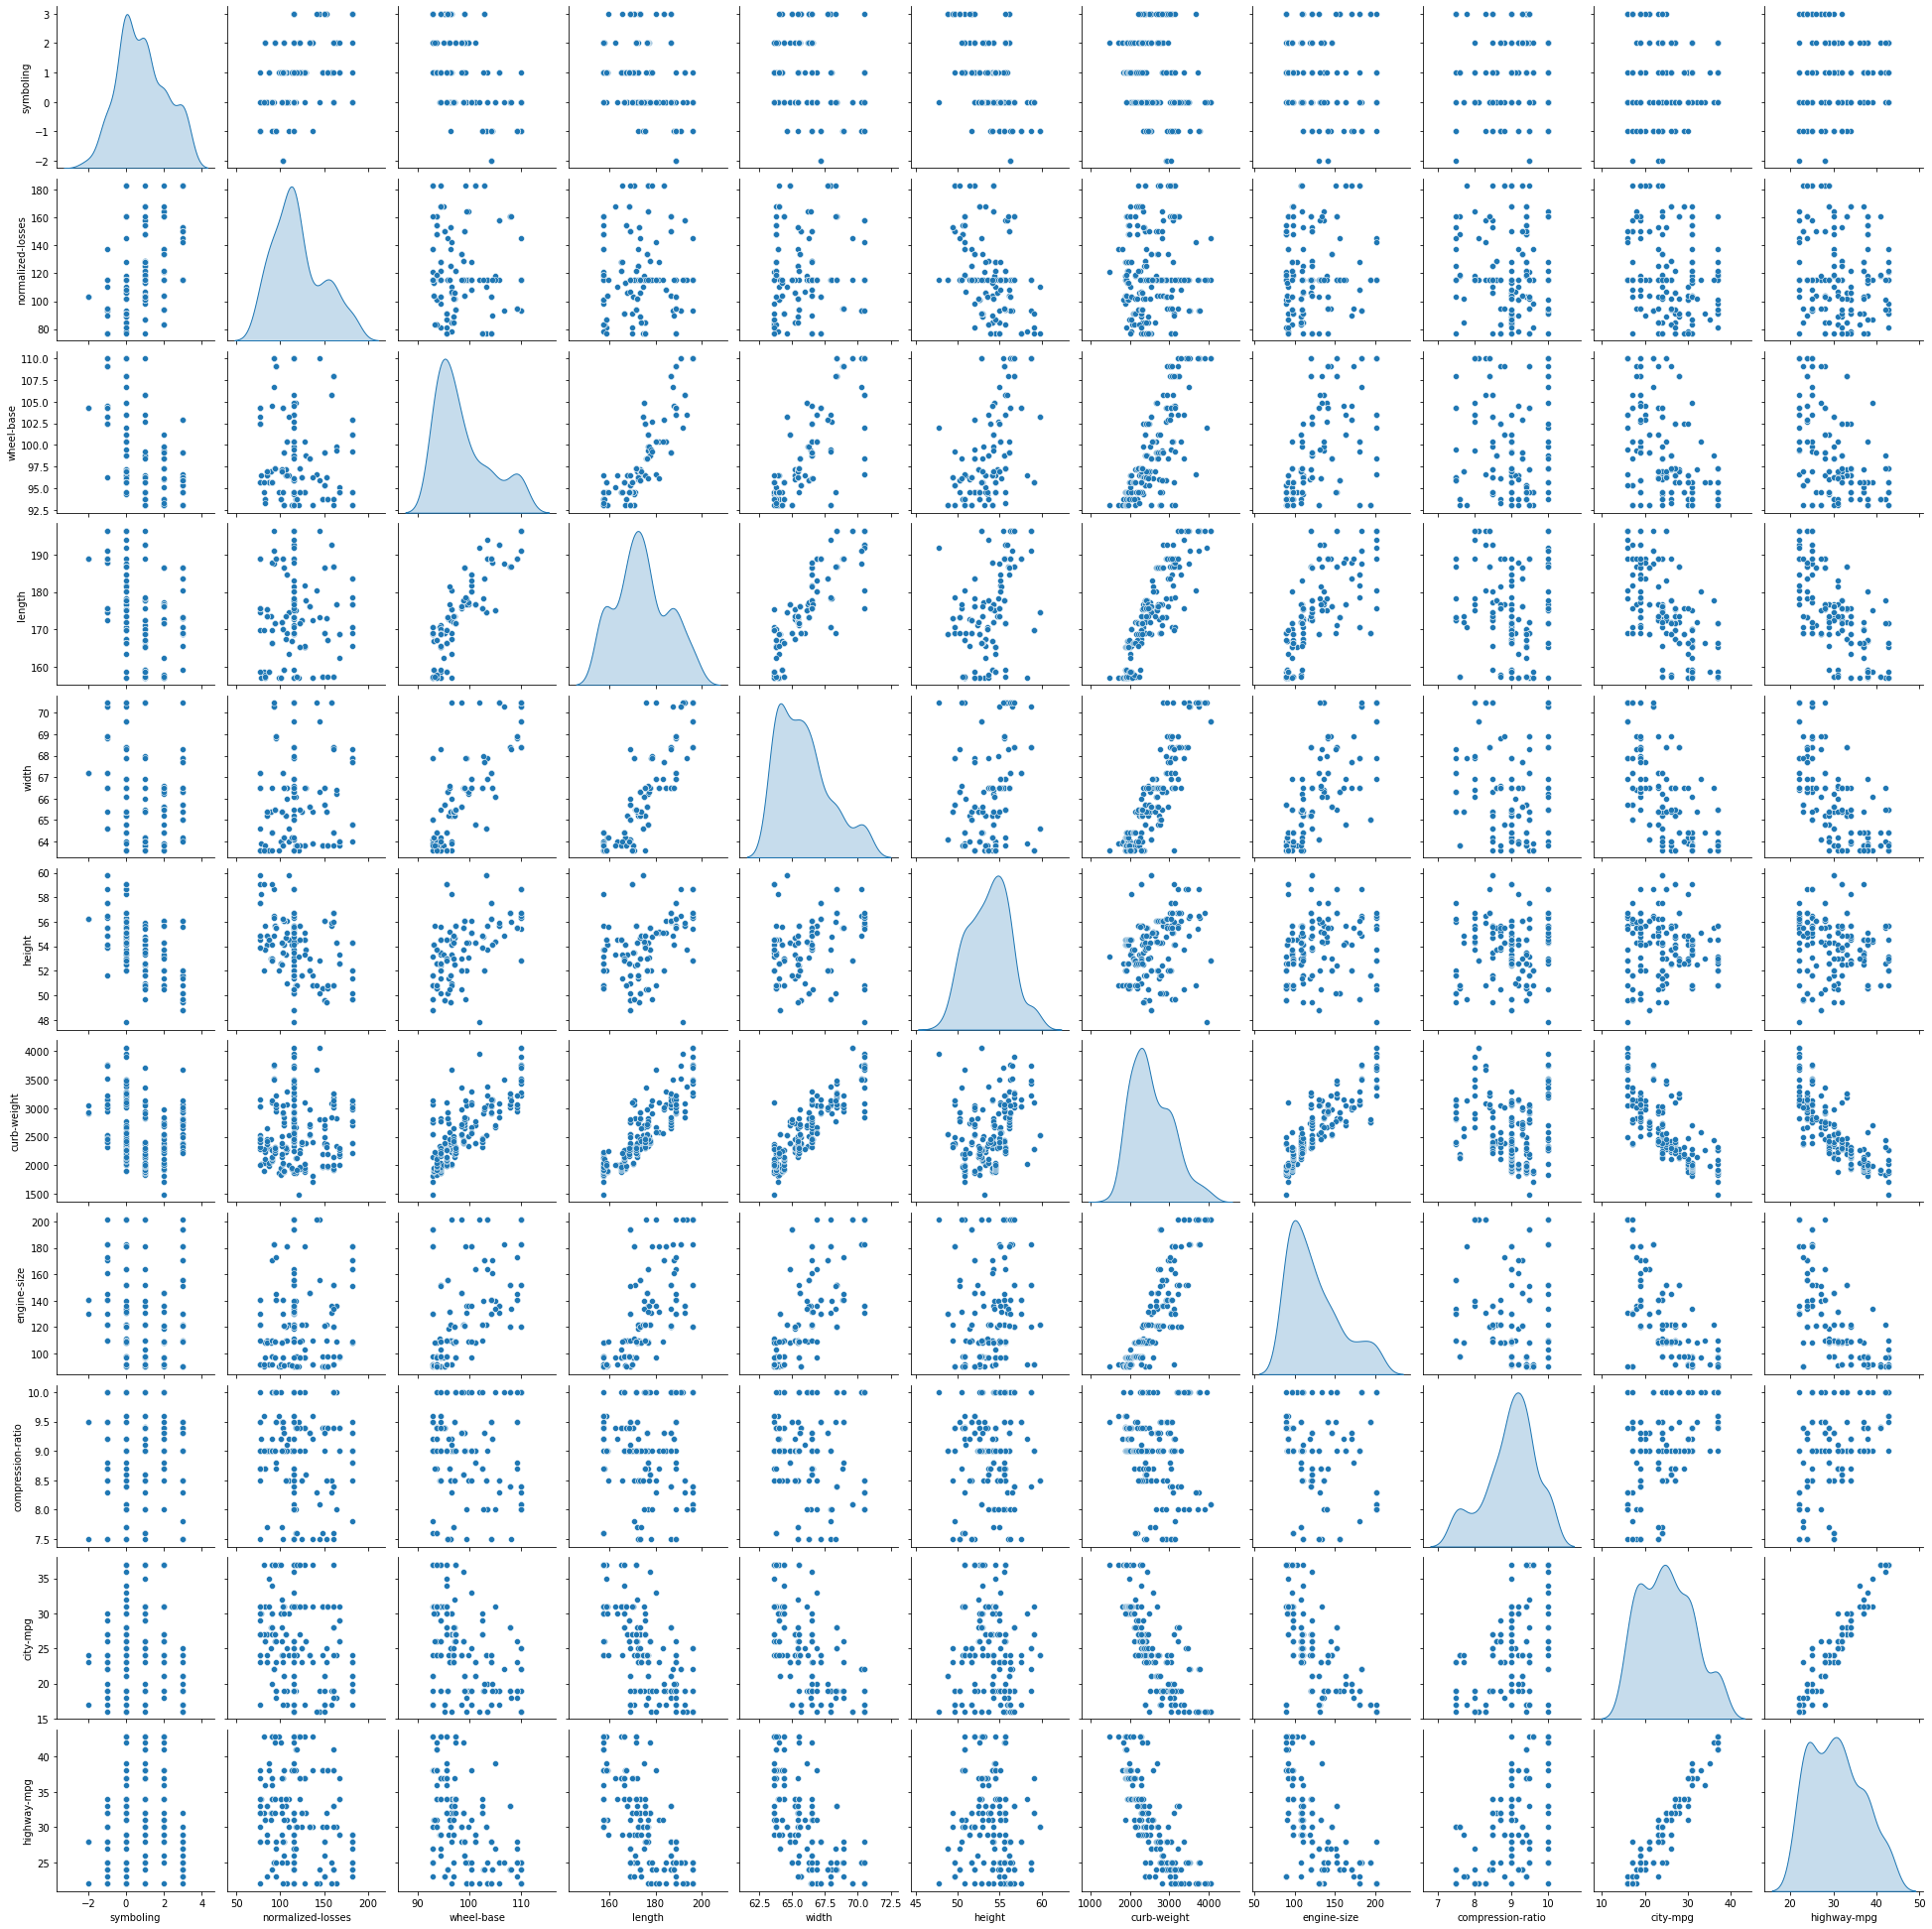

In [37]:
sns.pairplot(data, diag_kind='kde')

Some of the kernel density estimate plots show more than 1 peak, indicating the presence of clusters in the data set.

In [38]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7924\2373409979.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),


<AxesSubplot:>

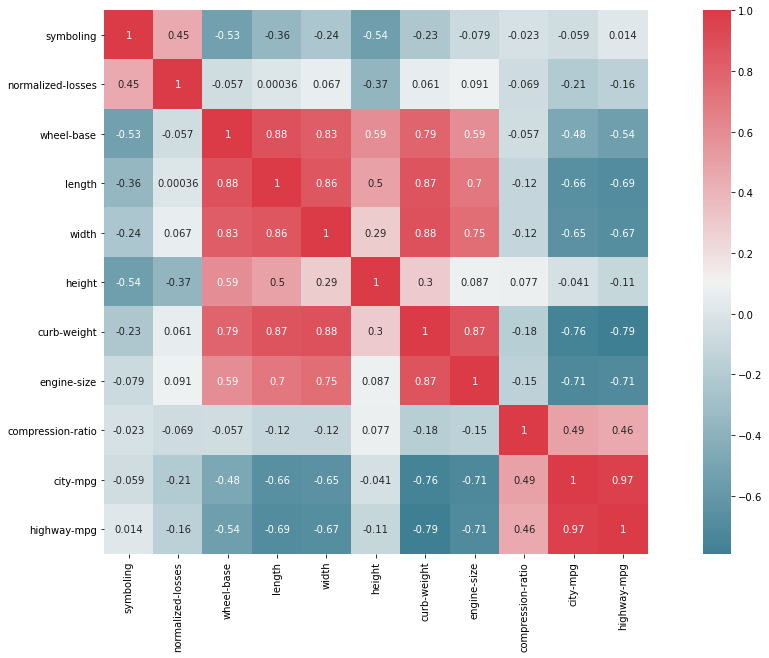

In [39]:
f, ax=plt.subplots(figsize=(20,10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax, annot=True)

The above corrplot shows presence of multi-collinearity in the data set.

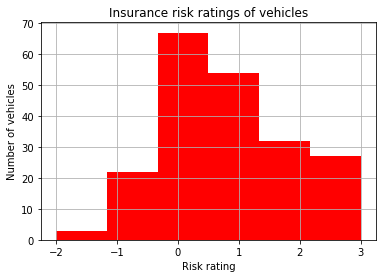

In [40]:
data.symboling.hist(bins=6,color='red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

From the above histogram we can infer that a major part of the distribution lies between the range of 0.5-1.5. We can also infer that a large number of cars in this data set are safe.

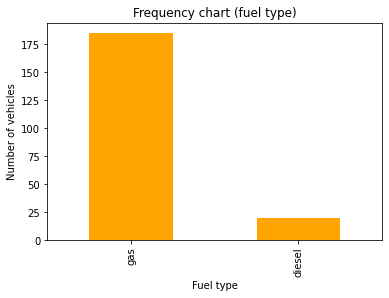

In [41]:
data['fuel-type'].value_counts().plot(kind='bar', color='orange')
plt.title("Frequency chart (fuel type)")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

From the above barchart we can infer that majority of the cars recorded in this dataset run on gas.

# Data Preprocessing

This dataset has 15 categorical variables and most of them have more than 2 categories. We can not run a regression model on text data. So, in order to deal with this challenge let's learn about label encoding. Label encoding is the process of converting categorical(text) data into numerical data.

Let's see how this is done.

In this example we will be working with the variable 'body-style' which has 5 categories, namely-
1. convertible
2. Hatchback
3. Sedan
4. Wagon
5. hardtop

In [42]:
#Data before lable encoding
data['body-style'].head(20)

0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
5           sedan
6           sedan
7           wagon
8           sedan
9       hatchback
10          sedan
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17          sedan
18      hatchback
19      hatchback
Name: body-style, dtype: object

In [45]:
#Label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['body-style'] = labelencoder.fit_transform(data['body-style'])

In [46]:
# data after label encoding
data['body-style'].head(20)

0     0
1     0
2     2
3     3
4     3
5     3
6     3
7     4
8     3
9     2
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    2
19    2
Name: body-style, dtype: int32

After running the label encoding code, we can see that the variable body-style has numerical values ranging from 0-4.

The problem with lable encoding is that it introduces an order between the categories, i.e. 0>1>2>3>4. This might confuse the model into thinkin that convertible is greater than hatchback.

So to deal with this problem, lets understand the concepts of one hot encoder.

In one hot encoding, categorical columns that have been label encoded are split into multiple colums and the values are replaced with 0's and 1's. 1's mark the preasence of a value and 0 its absence.

Lets look at an example -

In [47]:
#data before one hot encoding
data['body-style'].head(10)

0    0
1    0
2    2
3    3
4    3
5    3
6    3
7    4
8    3
9    2
Name: body-style, dtype: int32

In [43]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['body-style']]).toarray())


In [44]:
#data after one hot encoding\
enc_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
200,0.0,0.0,0.0,1.0,0.0
201,0.0,0.0,0.0,1.0,0.0
202,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,0.0,1.0,0.0
